# 1. Import the libraries and get the data

In [196]:
import numpy as np
import pandas as pd

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [198]:
titanic = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
# we've noticed there is null value so lets do data cleaning

# 2. Data Cleaning and understanding

In [199]:
titanic.head(2) # Survived is our target variable

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


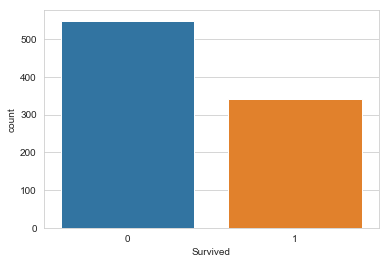

In [200]:
sns.countplot(x='Survived', data=titanic)
# 550 people died in titanic
# 350 people were alive

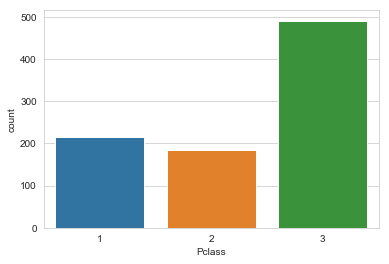

In [201]:
sns.countplot(x='Pclass', data=titanic)
# there were 210 people in class 1, 190 in class 2, and 490 in class3 which is the most people

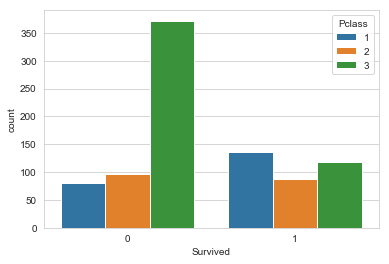

In [202]:
sns.countplot(x='Survived', hue = 'Pclass', data=titanic)
# We can see that 3rd class people mostly died more

In [203]:
titanic.groupby(by='SibSp').count()['Sex']

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Sex, dtype: int64

In [204]:
titanic[titanic['Survived']==1].groupby('Sex').count()['PassengerId']

Sex
female    233
male      109
Name: PassengerId, dtype: int64

In [205]:
titanic[titanic['Survived']==0].groupby('Sex').count()['PassengerId']

Sex
female     81
male      468
Name: PassengerId, dtype: int64

In [206]:
titanic.groupby(['Sex','SibSp']).count()['PassengerId'].unstack()

SibSp,0,1,2,3,4,5,8
Sex,,,,,,,
female,174,106,13,11,6,1,3
male,434,103,15,5,12,4,4


In [207]:
titanic.groupby(['Sex','SibSp','Survived']).count()['PassengerId'].unstack()

Survived          0      1
Sex    SibSp              
female 0       37.0  137.0
       1       26.0   80.0
       2        3.0   10.0
       3        7.0    4.0
       4        4.0    2.0
       5        1.0    NaN
       8        3.0    NaN
male   0      361.0   73.0
       1       71.0   32.0
       2       12.0    3.0
       3        5.0    NaN
       4       11.0    1.0
       5        4.0    NaN
       8        4.0    NaN

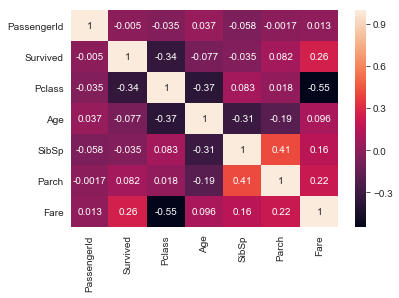

In [208]:
sns.heatmap(titanic.corr(), annot=True)

In [209]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3. Missing Data handling

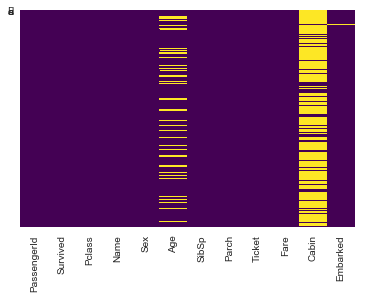

In [210]:
# missing data can be clearily viewed by using heatmap in isnull 
sns.heatmap(titanic.isnull(), cbar= False, yticklabels='False', cmap='viridis')

# From the picture we can see that Age, Cabin and Embarked has the missing value.
# 1> for Age we can impute the value
# 2> For Cabin we can drop the columns and
# 3> for embarked columns we can delete the missing value.

In [211]:
# to find the how many data are missing for those columns
titanic[['Age','Cabin','Embarked']].isnull().sum()
# we can see Age has 177 data missing so we can impute and Cabin we have 687 so we will drop it amd Embarked has 2, removeit

Age         177
Cabin       687
Embarked      2
dtype: int64

In [212]:
titanic.groupby(by='Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

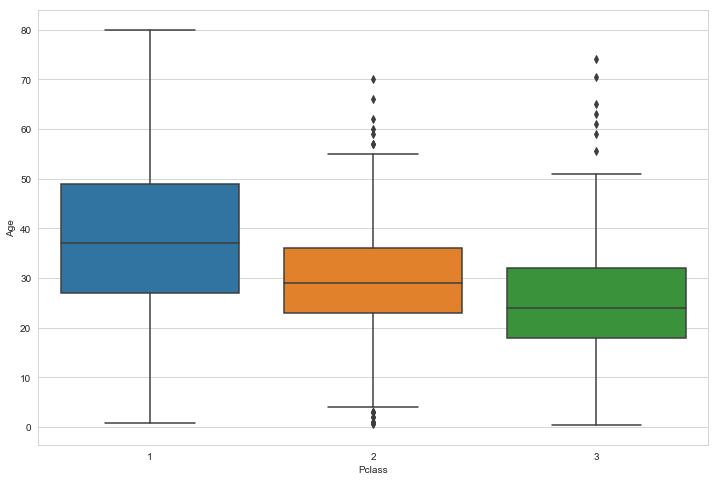

In [213]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [214]:
# lets impute Age by mean of Age group by Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis=1)

In [215]:
# For Cabin we can drop it
titanic.drop('Cabin', axis=1, inplace=True)
#We've succefully dropped Cabin

In [216]:
# For Embarked Columns we can just drop na values
titanic.dropna(axis=0,inplace = True)

In [217]:
titanic[['Age','Embarked']].isnull().sum()
# we have succefully dealed with missing data

Age         0
Embarked    0
dtype: int64

# 4. Deal with Categorical Values ( Converting them to dummy Variable)

In [218]:
titanic.head(2)
# We can see we have PassengerId, Pclass, Embarked, Sex as a categorical value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [219]:
# lets deal with Sex and Embarked
sex = pd.get_dummies(titanic['Sex'], drop_first=True ) # dummy variable of Age is saved in sex dataframe
embarked = pd.get_dummies(titanic['Embarked'], drop_first=True) # dummy variable of embarked is saved in dataframe

# Note Drop_first will drop 1 column from k dummy variable making it to k-1 dummy variable

# Since we've made sex and embared dummy variable column then we don't need the SEC and EMBARKED from titanic
titanic.drop(labels=['Sex','Embarked'], axis=1, inplace= True)

In [220]:
# we have dropped non dummy columns so lets concat dummy columns that we've created
titanic = pd.concat([titanic,sex,embarked], axis=1)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0


In [223]:
# We have succefully create the dummy variable and concatinate it 
# now we dont need PassengerId, name, ticket  so lets remove it
titanic.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [226]:
titanic.head(2) # we've succefully cleaned our data for training data set lets do for the test data set too

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# 5. Training Data 'Titanic' is cleaned. Lets clean out Test data set

In [227]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [228]:
# lets impute Age by mean of Age group by Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [232]:
test.drop('Cabin', axis=1, inplace=True)
test.dropna(axis=0,inplace = True)
test[['Age','Embarked']].isnull().sum()

Age         0
Embarked    0
dtype: int64

In [233]:
# lets deal with Sex and Embarked
sex = pd.get_dummies(test['Sex'], drop_first=True ) # dummy variable of Age is saved in sex dataframe
embarked = pd.get_dummies(test['Embarked'], drop_first=True) # dummy variable of embarked is saved in dataframe

# Note Drop_first will drop 1 column from k dummy variable making it to k-1 dummy variable

# Since we've made sex and embared dummy variable column then we don't need the SEC and EMBARKED from titanic
test.drop(labels=['Sex','Embarked'], axis=1, inplace= True)

In [234]:
test = pd.concat([test,sex,embarked], axis=1)
test.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1


In [236]:
test.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

# 6 Test And Titanic(train) both data are cleaned and ready for the model build up

### Split the titanic data in test train as train and validation

In [360]:
from sklearn.model_selection import train_test_split
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [361]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

### Fit model with x_train and y_train then validate with y_val

In [362]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [363]:
log.fit(x_train, y_train)

C:\Users\prati\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [364]:
predictions =log.predict(x_test)

### Metrices for analyzing the performance of the model

In [365]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [366]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       216
           1       0.76      0.65      0.70       140

   micro avg       0.78      0.78      0.78       356
   macro avg       0.78      0.76      0.76       356
weighted avg       0.78      0.78      0.78       356



In [367]:
print(confusion_matrix(y_test, predictions))

[[187  29]
 [ 49  91]]


In [368]:
log.score(x_test, y_test)

0.7808988764044944